In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
c, abs_ = np.genfromtxt('data.csv', delimiter = ',', skip_header = 1).T

(m, b), cov = np.polyfit(c, abs_, 1, cov = True)

x = np.linspace(0, 1.1)
y = m * x + b

dm = cov[0, 0]**0.5
db = cov[1, 1]**0.5

ten = 0.173
later = 0.151

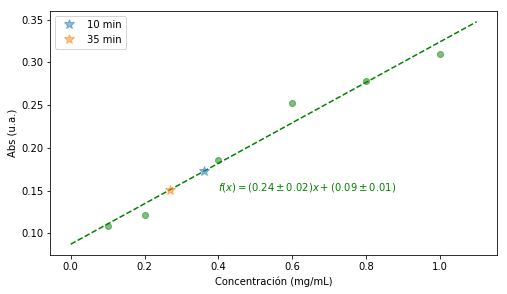

In [3]:
fig, ax = plt.subplots(figsize = (8, 4.5))

ax.plot(x, y, '--', c = 'g')
ax.plot(c, abs_, 'o', alpha = 0.5, c = 'g')
ax.plot((ten - b) / m, ten, '*', alpha = 0.5, ms = 10, label = '10 min')
ax.plot((later - b) / m, later, '*', alpha = 0.5, ms = 10, label = '35 min')

ax.text(0.4, 0.15, '$f(x) = (%.2f \pm %.2f)x + (%.2f \pm %.2f)$'%(m, dm, b, db), color = 'g')

ax.set_xlabel('Concentración (mg/mL)')
ax.set_ylabel('Abs (u.a.)')
ax.legend()

fig.savefig('Resultados.png', dpi = 300)

plt.show()

In [4]:
harinas = pd.read_excel('harina.xlsx', sheet_name = None)
huevos = pd.read_excel('huevo.xlsx', sheet_name = None)

ha_keys = list(harinas.keys())
hu_keys = list(huevos.keys())

X = 'Concentración\xa0(mg/mL)'
Y = 'Absorbancia '

In [5]:
def getSignificant(value):
    return np.ceil(abs(np.log10(value)))

def plot(dfs, keys, figsize = (5, 4.5)):
    fig, ax = plt.subplots(figsize = figsize)
    
    for key in keys:
        x, y = dfs[key][[X, Y]].values.T
        (m, b), cov = np.polyfit(x, y, 1, cov = True)
        y_ = m * x + b
        
        dm = cov[0, 0] ** 0.5 
        db = cov[1, 1] ** 0.5
        
        n_m = '%' + '.%df'%getSignificant(dm)
        n_b = '%' + '.%df'%getSignificant(db)
        
        n_m = ('(' + n_m + r' \pm ' + n_m + ')')%(m, dm)
        n_b = ('(' + n_b + r' \pm ' + n_b + ')')%(b, db)
        
        label = '$f(x) = %sx + %s$'%(n_m, n_b)
        c = ax.plot(x, y, 'o', ms = 4, label = label, alpha = 0.8)[0].get_color()
        ax.plot(x, y_, '--', c = c)
    ax.legend(fontsize = 'small')
    ax.set_xlabel('Concentración (mg/mL)')
    ax.set_ylabel('Absorbancia (u.a.)')
    
    return fig, ax

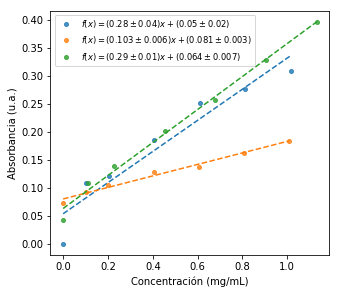

In [6]:
fig, ax = plot(harinas, ha_keys)
fig.savefig('harinas_reg.png', dpi = 300)

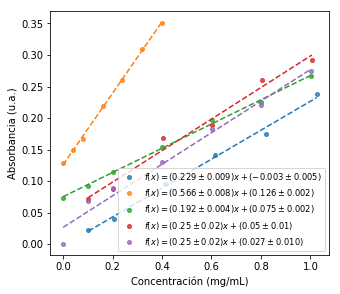

In [7]:
fig, ax = plot(huevos, hu_keys)
fig.savefig('huevos_reg.png', dpi = 300)

In [8]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

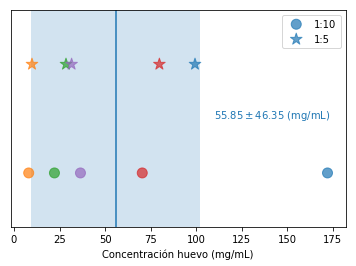

In [9]:
tens = np.array([1.7205, 0.0809, 0.2222, 0.704, 0.3649]) * 10 * 10
fives = np.array([1.9869, 0.1979, 0.5711, 1.596, 0.6327]) * 5 * 10

mean = (fives.mean() + tens.mean()) / 2
std = (fives.std() + tens.std()) / 2

ceros = np.zeros_like(tens)

fig, ax = plt.subplots()

ax.fill_between([mean - std, mean + std], [-0.5, -0.5], 0.5, interpolate = True, alpha = 0.2)

ax.scatter(tens, ceros - 0.25, color = colors[:5], alpha = 0.7, s = 100, label = '1:10')
ax.scatter(fives, ceros + 0.25, marker = '*', color = colors[:5], alpha = 0.7, s = 150, label = '1:5')
ax.plot([mean, mean], [-0.5, 0.5])

ax.text(110, 0, "$%.2f \pm %.2f$ (mg/mL)"%(mean, std), color = colors[0])

ax.set_xlabel('Concentración huevo (mg/mL)')

ax.set_yticks([])

ax.set_ylim(-0.5, 0.5)

ax.legend()

fig.savefig('concentraciones.png', dpi = 300)